In [10]:
# 합성곱  신경망
# cnn 
# 컨브넷
# 28, 28 , 1
import tensorflow as tf
from tensorflow.keras import layers
inputs = tf.keras.Input(shape = (28,28,1))
conv = layers.Conv2D(32,(3,3), activation='relu')(inputs)
conv = layers.MaxPooling2D()(conv)
conv = layers.Conv2D(64,(3,3), activation ='relu')(conv)
conv = layers.MaxPooling2D()(conv)
conv = layers.Conv2D(128,(3,3), activation ='relu')(conv)

In [15]:
flatlayer = layers.Flatten()(conv)
outputs =  layers.Dense(10,activation='softmax')(flatlayer)

In [16]:
model = tf.keras.Model(inputs = inputs, outputs = outputs)

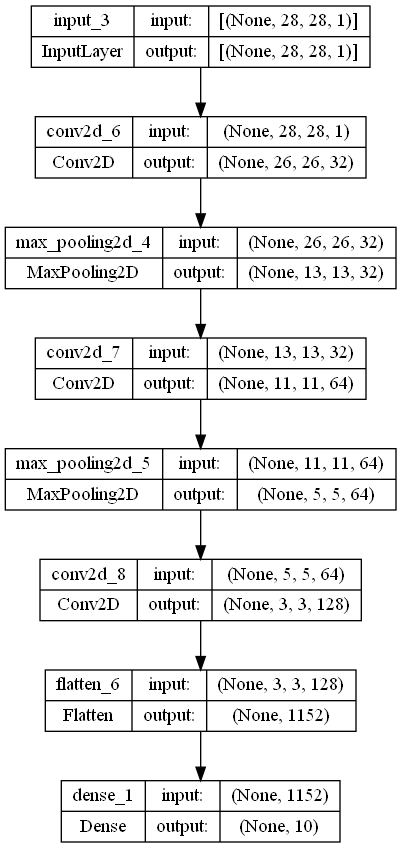

In [21]:
# model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)

In [25]:
# 데이터 준비하기
# MNIST 이미지
from tensorflow.keras.datasets import mnist
import numpy as np

In [26]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
# convolution은 3차원 텐서이기 때문에 차수를 맞춰준다.
x_train = np.expand_dims(x_train,axis = -1)
x_test = np.expand_dims(x_test,axis = -1)

In [27]:
# 데이터 스케일링
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [28]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 31s 33ms/step - loss: 0.1619 - accuracy: 0.9526
Epoch 2/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0459 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0326 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0198 - accuracy: 0.9937


In [29]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9902


[0.03292100504040718, 0.9901999831199646]

#### 폴링층의누락

In [31]:
conv2 = layers.Conv2D(32,(3,3),activation='relu')(inputs)
conv2 = layers.Conv2D(64,(3,3),activation='relu')(conv2)
conv2 = layers.Conv2D(128,(3,3),activation='relu')(conv2)
conv2 = layers.Flatten()(conv2)
outputs = layers.Dense(10,activation='softmax')(conv2)
model2 = tf.keras.Model(inputs=inputs,outputs=outputs)

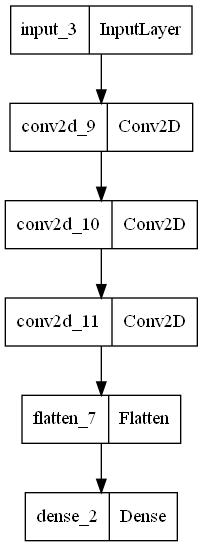

In [32]:
tf.keras.utils.plot_model(model2)

In [33]:
model2.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=5,batch_size=64)
model2.evaluate(x_test,y_test)

Epoch 1/5
938/938 [==============================] - 139s 147ms/step - loss: 0.1158 - accuracy: 0.9653
Epoch 2/5
938/938 [==============================] - 135s 144ms/step - loss: 0.0412 - accuracy: 0.9874
Epoch 3/5
938/938 [==============================] - 134s 143ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 4/5
938/938 [==============================] - 145s 155ms/step - loss: 0.0175 - accuracy: 0.9947
Epoch 5/5
313/313 [==============================] - 5s 14ms/step - loss: 0.0605 - accuracy: 0.9825


[0.060496989637613297, 0.9825000166893005]

#### 작은 데이터셋 문제에서 딥러닝의 타당성

In [36]:
!pip install gdown

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=d1aae5391565b1ca44a3d0753d4c6de67f324573703420d702b9f67349d82167
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ed\8a\de\15273923b1f5adacc09306cc48dcedc6b082892569afb2dfc7
Successfully built gdown


In [37]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: D:\leeky_ai\dogs-vs-cats.zip
100%|████████████████████████████████████████████████████████████████| 852M/852M [00:36<00:00, 23.4MB/s]


'dogs-vs-cats.zip'

In [53]:
import zipfile

In [59]:
zipfile.ZipFile('D:/leeky_ai/dogs-vs-cats.zip').extractall()
zipfile.ZipFile('D:/leeky_ai/train.zip').extractall()

#### 이미지를 훈련,검증,테스트 디렉터리로 복사

In [111]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [113]:
original_dir, new_base_dir

(WindowsPath('train'), WindowsPath('cats_vs_dogs_small'))

In [114]:
def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [ f"{category}.{i}.jpg" for i in range(start_index,end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/fname, dst=dir/fname)

In [118]:
os.chdir('D:/leeky_ai/dogs-vs-cats/train')

In [119]:
make_subset("train", start_index=0, end_index=1000)

In [120]:
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [121]:
# 데이터 전처리  이미지 데이터를 수치형으로 변환

In [123]:
from tensorflow.keras.utils import image_dataset_from_directory
new_base_dir

WindowsPath('cats_vs_dogs_small')

In [126]:
train_dataset =  image_dataset_from_directory(
    new_base_dir/"train"    
)
validation_dataset =  image_dataset_from_directory(
    new_base_dir/"validation"    
)
test_dataset =  image_dataset_from_directory(
    new_base_dir/"test"    
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [127]:
import numpy as np
import tensorflow as tf
random_numbers =  np.random.normal(size=(1000,16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [133]:
len(dataset)

1000

In [130]:
for i, element in enumerate(dataset):
    if i > 2: break
    print(element.shape)

(16,)
(16,)
(16,)


In [131]:
batch_dataset =  dataset.batch(32)
for i, element in enumerate(batch_dataset):
    if i>2 : break
    print(element.shape)

(32, 16)
(32, 16)
(32, 16)


In [134]:
reshape_dataset =  dataset.map(lambda x: tf.reshape(x, (4,4)))
for i, element in enumerate(reshape_dataset):
    if i>2 : break
    print(element.shape)

(4, 4)
(4, 4)
(4, 4)


#### dataset이 반환하는 데이터와 레이블 크기 확인

In [140]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:",labels_batch.shape)
    break

데이터 배치 크기: (32, 256, 256, 3)
레이블 배치 크기: (32,)


#### 모델 만들기

In [142]:
from tensorflow import keras
from tensorflow.keras import layers

In [143]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Rescaling(1/255.0)(inputs)
x = layers.Conv2D(32,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [144]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [145]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convert_from_scratch.keras',
        save_best_only=True,
        monitor = 'val_loss'
    )
]

In [ ]:
hist = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)